___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**      -----------> 28 gün sonra ölçülen basınç ve betonun dayanıklılığı

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [91]:
df = pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [93]:
df.isnull().any()

Cement                                False
Slag                                  False
Fly ash                               False
Water                                 False
SP                                    False
Coarse Aggr.                          False
Fine Aggr.                            False
SLUMP(cm)                             False
FLOW(cm)                              False
Compressive Strength (28-day)(Mpa)    False
dtype: bool

In [94]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [5]:
df.rename(columns={"Compressive Strength (28-day)(Mpa)" : "compressive_strength_mpa"},inplace=True)

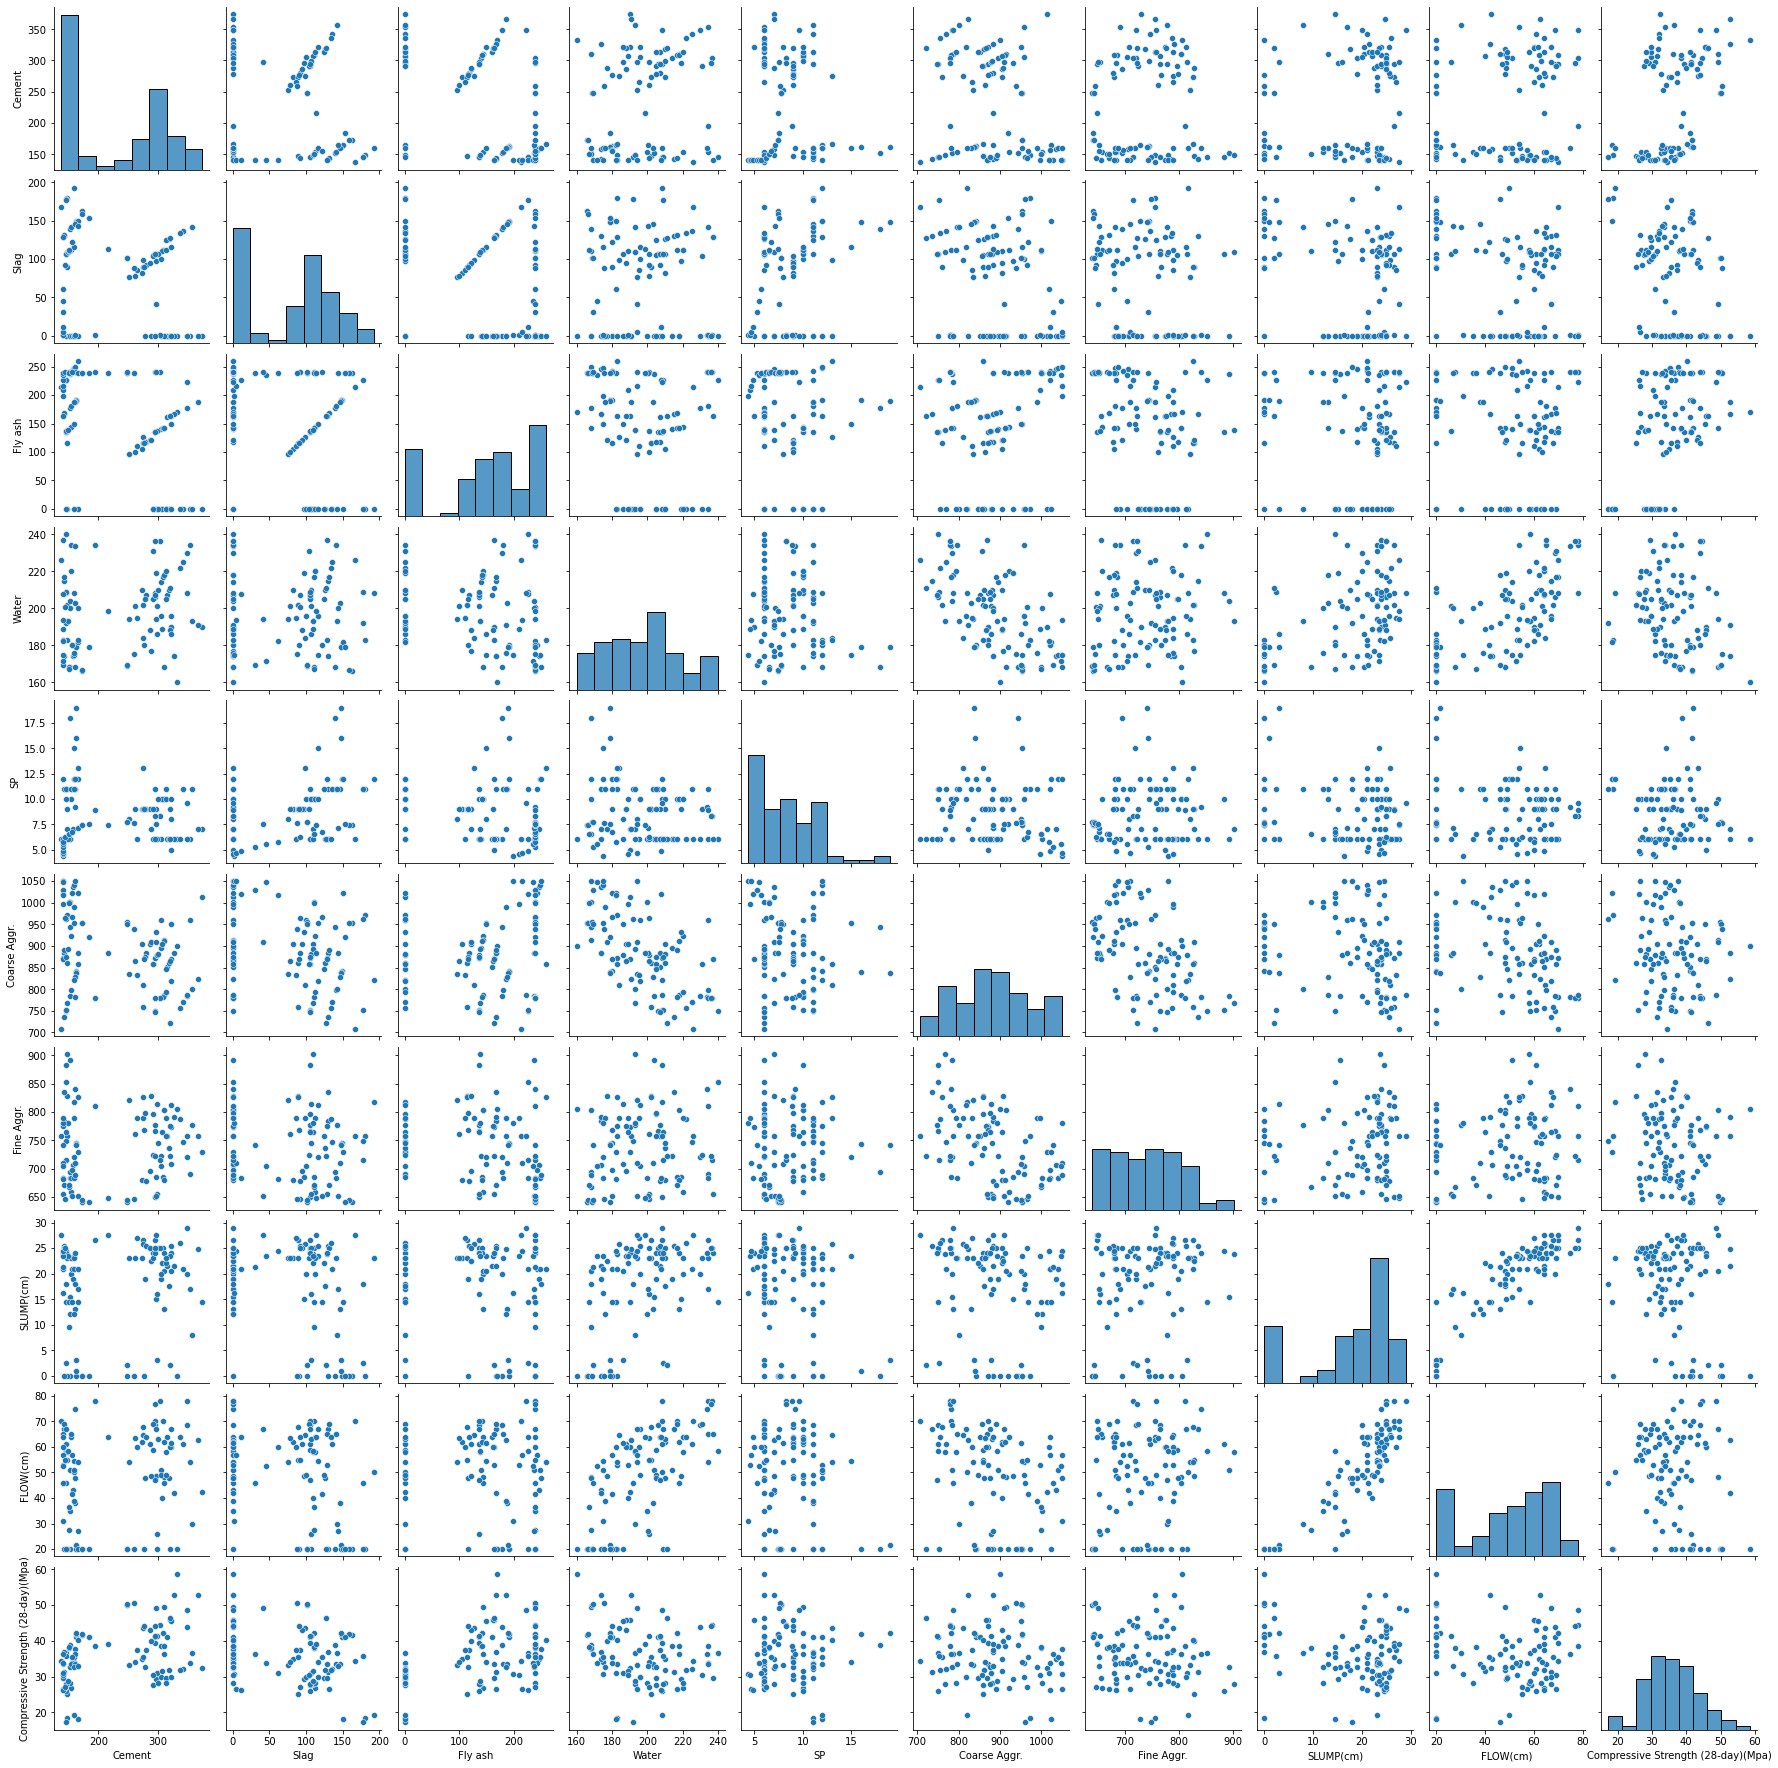

In [8]:
sns.pairplot(df)

In [6]:
for i in df.drop(columns ="compressive_strength_mpa"):
    print(f"corr between target feature(mpa) and {i:<12}:  {df.compressive_strength_mpa.corr(df[i])}")

corr between target feature(mpa) and Cement      :  0.445656142563621
corr between target feature(mpa) and Slag        :  -0.33152226429150117
corr between target feature(mpa) and Fly ash     :  0.44437968506874465
corr between target feature(mpa) and Water       :  -0.2543201492378115
corr between target feature(mpa) and SP          :  -0.037909280335955774
corr between target feature(mpa) and Coarse Aggr.:  -0.16060986575287395
corr between target feature(mpa) and Fine Aggr.  :  -0.15453179659662755
corr between target feature(mpa) and SLUMP(cm)   :  -0.2234993688009328
corr between target feature(mpa) and FLOW(cm)    :  -0.12418851574647044


In [7]:
## linearity olmadığından linear regresyona uygun değildir diyebilir miyiz ? 
## güçlü korelasyon ----> güçlü bir linear ilişkiyi de bizi gösteirir çünkü ? 

<AxesSubplot:>

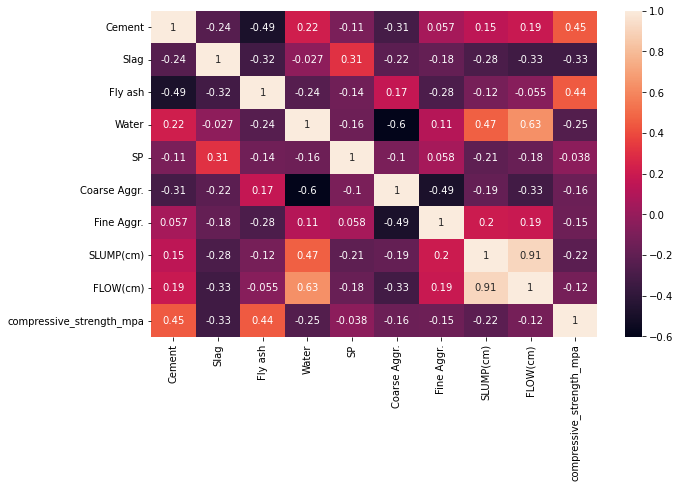

In [8]:
sns.heatmap(df.corr(), annot=True)

## slump ile flow arasındaki multicolineartiyi görmemiz gerekiyor

<AxesSubplot:>

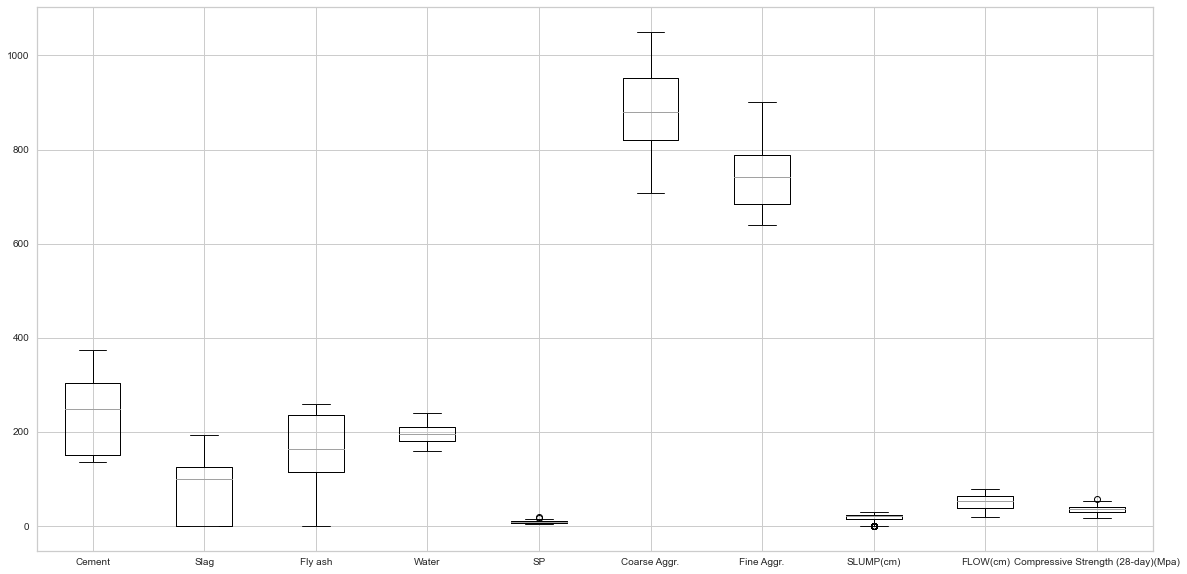

In [96]:
plt.figure(figsize =(20,10))                 # outlier kontrolü de yapılabilir.
df.boxplot()

## garbage var mı ona bakıyoruz aslında

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [9]:
X  = df.drop(columns ="compressive_strength_mpa")
y  = df["compressive_strength_mpa"]

In [10]:
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000


In [11]:
y

0     34.990
1     41.140
2     41.810
3     42.080
4     26.820
       ...  
98    49.970
99    50.230
100   50.500
101   49.170
102   48.700
Name: compressive_strength_mpa, Length: 103, dtype: float64

### Splitting data into training and testing
* Split the data into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

# Robustscaler, outlierların mevcut olabileceği durumlarda kullanılır,minmaxscaler ------> normalizasyon

## MinMaxScaler ---------> datada dummy featurlar çoksa bunların dağılımını bozmamak adına tercih sebebi olabiliyor.

In [15]:
scaler.fit(X_train)  # Apply just for X_tarin not for X_test (Kalıp çıkarma)

# x_traini fit ettik dikkat X'i değil.burada kalıbımı çıkarıyor.
#Ayrıca data leakage engelliyoruz böylece

StandardScaler()

In [16]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit        
                                           # burada scale etmiş oluyoruz
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [17]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled      

array([[ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
        -0.20967429,  0.56267018,  0.70678525,  0.65191812],
       [-0.81306726, -1.29720985,  1.30473577, -0.65655824,  1.53038037,
        -0.33492343,  1.41509971,  0.37338319,  0.3154619 ],
       [ 0.87081264,  0.45936384, -1.64936204,  0.66419403,  0.49979299,
        -0.08442514,  0.09624647,  0.81791927,  0.82014623],
       [ 0.71888363,  0.24594834, -0.27457037, -0.41197449,  0.15626386,
         0.17745943, -0.69184876,  0.81791927,  0.70799416],
       [-0.88903177,  1.09961032,  0.48667792,  0.32177677,  0.84332212,
        -0.676512  , -0.46667869, -0.51568895, -0.58175469],
       [-1.07894304,  1.6085242 ,  0.92979259,  0.61527728,  0.84332212,
        -1.553256  , -0.38626081, -1.68259614, -1.59112335],
       [-0.94727123,  0.70725415,  1.07749748, -0.80820017, -0.63385314,
         0.89251817, -1.39148432, -0.34898792, -0.38548856],
       [ 1.11136691,  0.77127879, -1.64936204,  0.66419403, -0

### Artık dışarıdan modele görmediği bir data vereceksek bunu ham data şeklinde veremeyiz çünkü model scale edilmiş olarak öğrendi dışarıdan gelen dataya da transform uygulamamız gerekecek.

In [18]:
pd.DataFrame(X_train_scaled,columns = X_train.columns) 

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,0.997,-1.297,-0.036,1.056,0.500,0.269,-0.949,0.707,0.764
1,-1.041,1.658,-1.649,-0.657,0.843,0.952,0.289,-1.960,-1.591
2,1.137,0.788,0.214,0.713,-0.874,-1.906,-0.258,-1.738,-1.591
3,0.858,0.459,-1.649,-0.510,-0.874,-0.107,1.222,-1.627,-1.591
4,0.229,0.361,1.067,-1.346,-0.290,0.749,-1.583,-1.960,-1.591
...,...,...,...,...,...,...,...,...,...
77,1.048,0.541,-1.649,1.153,0.500,-1.075,0.804,0.596,0.540
78,1.820,-1.297,-1.649,-0.314,-0.531,1.419,-0.145,-0.349,-0.329
79,0.932,-1.294,1.075,1.956,-0.084,-1.233,-0.381,0.818,1.661
80,1.415,0.935,-1.649,1.398,0.843,-1.348,0.128,0.373,0.708


## checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.

In [19]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [20]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## ben 1.varsayımım olan linearity'yi scale edilmiş bir data da mı bakmalıyım yoksa bu farketmez mi ? 

##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model

LinearRegression()

In [23]:
model.fit(X_train_scaled,y_train)

LinearRegression()

### 1.1 Interpret the model
* Interpret the model by looking at the coefficients

In [24]:
model.intercept_

35.84719512195121

In [25]:
model.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [26]:
# y_pred = 35.8471  +   4.28X1 + -2.22X2....

In [28]:
coeff_df = pd.DataFrame(data = model.coef_ ,index=X.columns,columns = ["Coefficient"])
coeff_df

,Coefficient
Cement,4.280
Slag,-2.223
Fly ash,3.932
Water,-4.771
SP,0.121
Coarse Aggr.,-5.277
Fine Aggr.,-2.611
SLUMP(cm),-2.188
FLOW(cm),1.466


In [29]:
y_pred = model.predict(X_test_scaled)

In [30]:
y_train_pred = model.predict(X_train_scaled)

In [31]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [32]:
comparing = pd.DataFrame(my_dict)
comparing.sample(5)

,Actual,Pred,Residual
40,35.660,39.032,-3.372
18,49.300,44.674,4.626
4,26.820,27.054,-0.234
85,30.970,32.896,-1.926
10,26.020,28.773,-2.753


In [48]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
30,45.820,44.889,0.931
67,40.340,41.416,-1.076
62,28.290,28.566,-0.276
47,43.010,39.400,3.610
42,33.510,35.143,-1.633
40,35.660,39.032,-3.372
90,35.520,37.359,-1.839
45,31.770,30.865,0.905
10,26.020,28.773,-2.753
0,34.990,34.471,0.519


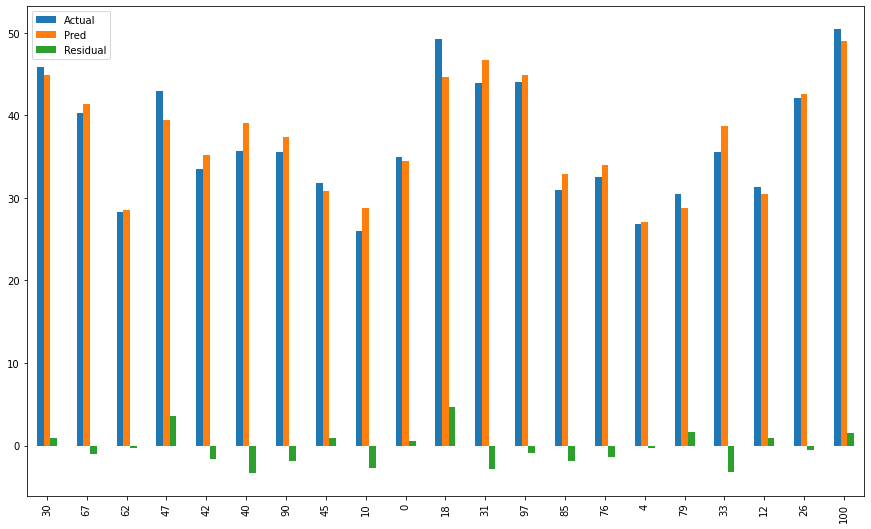

In [49]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [34]:
train_val(y_train,y_train_pred,y_test,y_pred,"model(linear)")

,model(linear)_train,model(linear)_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [35]:
## test datasının sonuçları daha iyi geldi acaba şansa mı ? 

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
capraz_dogrulama = cross_val_score(estimator=model  ,  X =X_train_scaled , y = y_train , cv=10 )

In [38]:
capraz_dogrulama

array([0.94543648, 0.94337382, 0.59394067, 0.68802557, 0.65972087,
       0.93274303, 0.90766953, 0.91515243, 0.82617985, 0.85001894])

In [39]:
capraz_dogrulama.mean() # ------> aslında modelimin gerçek skoru bu !!!

0.8262261195945758

## çapraz doğrulama test skorum 0.82 normal train skorum -----> 0.90

In [41]:
from sklearn.model_selection import cross_validate

In [42]:
model_ = LinearRegression()
scores = cross_validate(model_, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 
                                                            'neg_root_mean_squared_error'], cv = 5,return_train_score=True)

In [43]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()                          # bizim modelimizin gerçek skoru :

test_r2                              0.846
train_r2                             0.909
test_neg_mean_absolute_error        -2.230
train_neg_mean_absolute_error       -1.888
test_neg_mean_squared_error         -7.852
train_neg_mean_squared_error        -5.682
test_neg_root_mean_squared_error    -2.738
train_neg_root_mean_squared_error   -2.379
dtype: float64

## aslında bir overfitting var !!!!!!!!!!!

In [59]:
train_val(y_train,y_train_pred,y_test,y_pred,"model(linear)")

,model(linear)_train,model(linear)_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [60]:
## zaten bu data linear regresyona uygun değil deyip burayı geçsek olur mu ? 

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [46]:
from sklearn.linear_model import Ridge        # -----> model için
from sklearn.linear_model import RidgeCV      # -------> uygun parametre için

In [47]:
ridge_model_alpha1 = Ridge()       # default ------> alpha : 1.0  , random_state=None

In [48]:
ridge_model_alpha1.fit(X_train_scaled, y_train)

Ridge()

In [49]:
y_pred = ridge_model_alpha1.predict(X_test_scaled)

In [50]:
y_train_pred = ridge_model_alpha1.predict(X_train_scaled)

In [51]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_alpha1")
rs

,ridge_alpha1_train,ridge_alpha1_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [71]:
## alpha = 1 olunca modelim çok az kötüleşti demek ki best alpha bu değilmiş diyebiliriz 
## ama belki de şansa böyle geldi cv yaparak bakalım bir de.

In [72]:
capraz_dogrulama = cross_val_score(estimator=ridge_model_alpha1 ,  X = X_train_scaled , y = y_train , cv=10 )
capraz_dogrulama

array([0.94581403, 0.95365535, 0.57625701, 0.70190217, 0.69281519,
       0.92661471, 0.89811839, 0.92350056, 0.82560031, 0.85067387])

In [73]:
capraz_dogrulama.mean()

0.8294951599819507

### yukarıdaki gibi çapraz doğrulamalarda modelimin düşük çıktığını zaten gördük :biz şimdilik alphayı değiştirerek skor almaya bakalım :

In [52]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [53]:
ridge_cv_search_alpha_model = RidgeCV(alphas=alpha_space, cv = 10)           # ridgecv olduğuna dikkat edelim.
ridge_cv_search_alpha_model

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [54]:
## burada alphayı 1000 kere deneyecek duruma mı geliyor ?   10 * linspace  100'den dolayı

In [55]:
ridge_cv_search_alpha_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [56]:
ridge_cv_search_alpha_model.alpha_

0.904040404040404

 # en iyi alpha buymuş.diyor bizim verdiklerimize göre.teyit edelim.

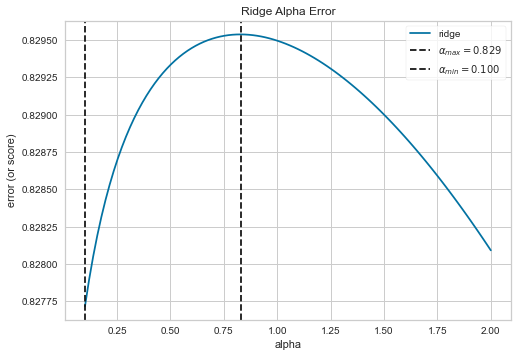

In [57]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 2, 100)


# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,                                             # ridgecv yazmıyoruz buraya.
    cv=10,

)

visualizer.fit(X_train_scaled, y_train)
visualizer.show();

## aslında en iyi alpha = 0.82 imiş çünkü biz aralığımızı daha da hassaslaştırdık !!! -----> alpha = 0.82'ye göre tekrar modelleyeceğiz şimdi :

In [58]:
ridge_model_alpha_best = Ridge(alpha=0.82)       # default ------> alpha : 1.0  , random_state=None

In [59]:
ridge_model_alpha_best.fit(X_train_scaled, y_train)

Ridge(alpha=0.82)

In [60]:
y_pred = ridge_model_alpha_best.predict(X_test_scaled)

In [61]:
y_train_pred = ridge_model_alpha_best.predict(X_train_scaled)

In [62]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_alphabest")
rs

,ridge_alphabest_train,ridge_alphabest_test
R2,0.907,0.912
mae,1.937,1.732
mse,5.911,4.476
rmse,2.431,2.116


## linear regresyondaki değerlerim daha iyi bir overfittinglik olmadığından düzenlemede sıkıntı yaşıyoruz gibi geldi bana bu overfittingliği çapraz doğrulama ile gördük aslında !!!!

## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [63]:
from sklearn.linear_model import Lasso        # -----> model için
from sklearn.linear_model import LassoCV      # -------> uygun parametre için

In [64]:
lasso_model_alpha1 = Lasso()
lasso_model_alpha1 .fit(X_train_scaled, y_train)

Lasso()

In [65]:
y_pred = lasso_model_alpha1.predict(X_test_scaled)
y_train_pred = lasso_model_alpha1.predict(X_train_scaled)

In [66]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lassoalpha_1")
lss

,lassoalpha_1_train,lassoalpha_1_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


### search alpha : 

In [67]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [68]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv = 10)
lasso_cv_model

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [69]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [70]:
lasso_cv_model.alpha_    

0.1

## bizim verdiğimiz en küçük alpha best alpha olduğundan bunu aralığımızı güncellesek iyi olacak : 

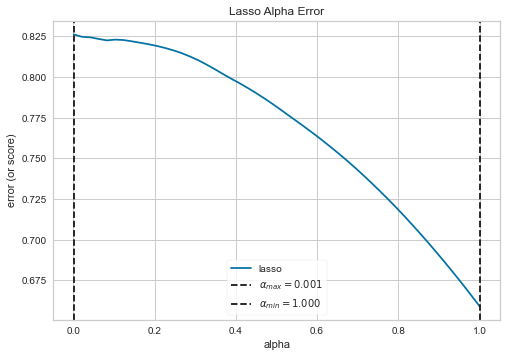

In [71]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.001, 1, 50)


# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Lasso(),
    alphas=alpha_space,                                             # lassocv yazmıyoruz buraya.
    cv=10,

)

visualizer.fit(X_train_scaled, y_train)
visualizer.show();

### görüldüğü gibi best alpha = 0.001

In [72]:
lasso_model_alphabest = Lasso(alpha=0.001)
lasso_model_alphabest.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [73]:
y_pred = lasso_model_alphabest.predict(X_test_scaled)
y_train_pred = lasso_model_alphabest.predict(X_train_scaled)

In [74]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lassoalpha_best")
lss

,lassoalpha_best_train,lassoalpha_best_test
R2,0.907,0.912
mae,1.936,1.738
mse,5.875,4.448
rmse,2.424,2.109


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [76]:
from sklearn.model_selection import GridSearchCV  

In [77]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [78]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [81]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 0.82],
            "l1_ratio":[0.0, 0.1, 0.5, 0.9, 0.95, 0.99, 1]}

In [82]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [83]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.5, l1_ratio=0.0; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.0; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.0; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.82, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.0; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.82, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 0.82],
                         'l1_ratio': [0.0, 0.1, 0.5, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [85]:
grid_model.best_params_         
# ---------> ridge'e daha uygunmuş diyoruz bunu kullanarak elde edeceğimiz sonuçlar ridge best alpha ile aynı olmalı.

{'alpha': 0.01, 'l1_ratio': 0.0}

In [86]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [87]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.907,0.912
mae,1.937,1.732
mse,5.911,4.476
rmse,2.431,2.116
